In [46]:
def save_generated_image(output: str, filename: str, *, show: bool = True) -> str:
    filename = re.sub(r'[^a-zA-Z0-9._-]+', '-', filename).strip('-')
    if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.webp', '.gif')):
        filename += '.jpg'

    urls = re.findall(r'https://\S+', output)
    if not urls:
        raise ValueError("No https URL found in output.")
    url = urls[1] if len(urls) > 1 else urls[0]

    dst_dir = pathlib.Path("img")
    dst_dir.mkdir(exist_ok=True)
    path = dst_dir / filename

    with requests.get(url, stream=True, timeout=60) as response:
        response.raise_for_status()
        with open(path, "wb") as file:
            for chunk in response.iter_content(1 << 14):
                if chunk:
                    file.write(chunk)

    if show:
        try:
            from IPython.display import display, Image
            display(Image(filename=str(path), width=200))
        except ImportError:
            pass

    return str(path)

import os, re, pathlib, requests,json


def dump(filename, pyList):
    with open(filename, 'w',encoding='utf-8') as file:
        json.dump(pyList, file,indent=2,ensure_ascii=False)


def load(filename):
    idiom_list=[]
    with open(filename, 'r',encoding='utf-8') as file:
        idiom_list = json.load(file)
    return idiom_list



Decriptions = load('Idioms/Description.json')
idioms = load('Idioms/Idioms.json')

In [65]:
import openai

client = openai.OpenAI(
    api_key="xxxx", # or os.getenv("POE_API_KEY")
    base_url="https://api.poe.com/v1",
)
models = ["GPT-Image-1","DALL-E-3","Gemini-2.5-Flash-Image","Imagen-4","Qwen-Image","Seedream-4.0"]
demo = "Cartoon bull wearing a business suit and tie, sweating nervously while tiptoeing through an elegant porcelain shop, accidentally knocking over\
 teacups with his tail, shop owner fainting in background"
print(demo)

Cartoon bull wearing a business suit and tie, sweating nervously while tiptoeing through an elegant porcelain shop, accidentally knocking over teacups with his tail, shop owner fainting in background


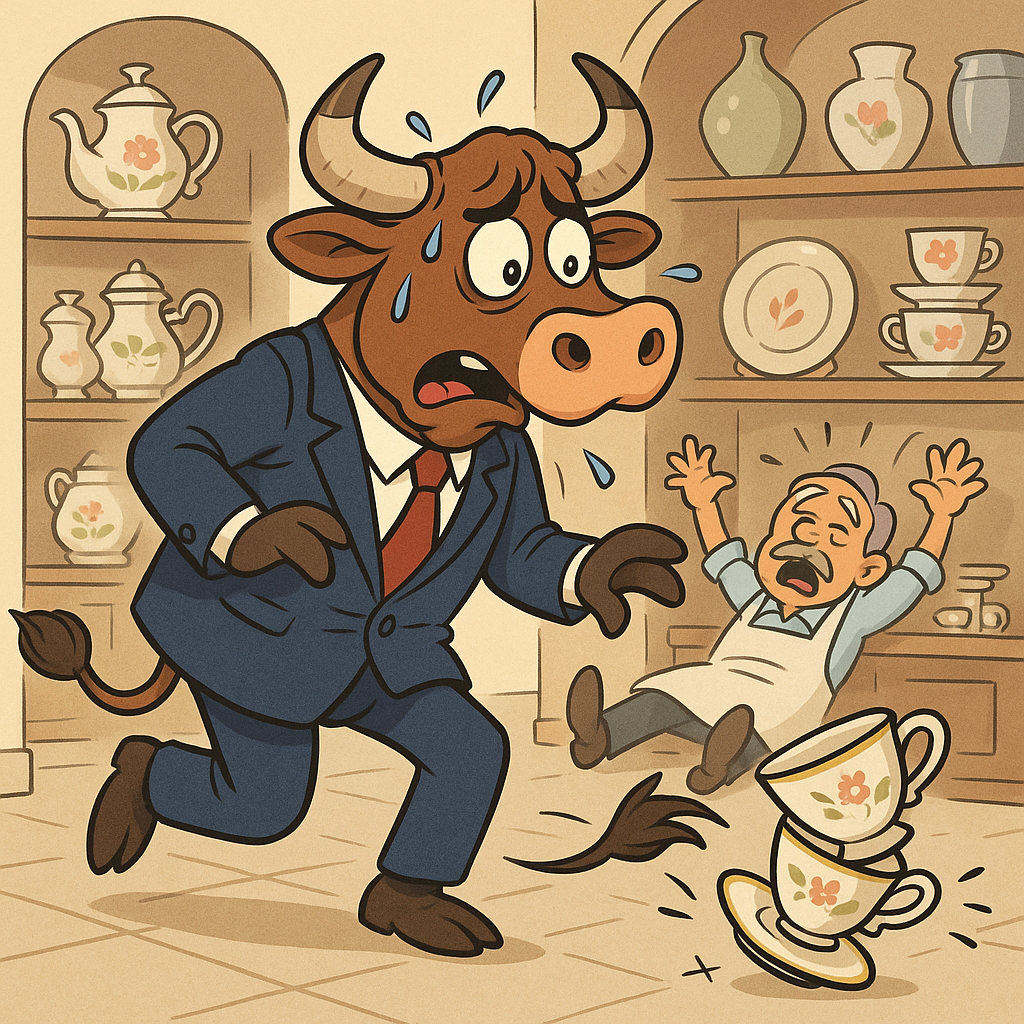

GPT-Image-1


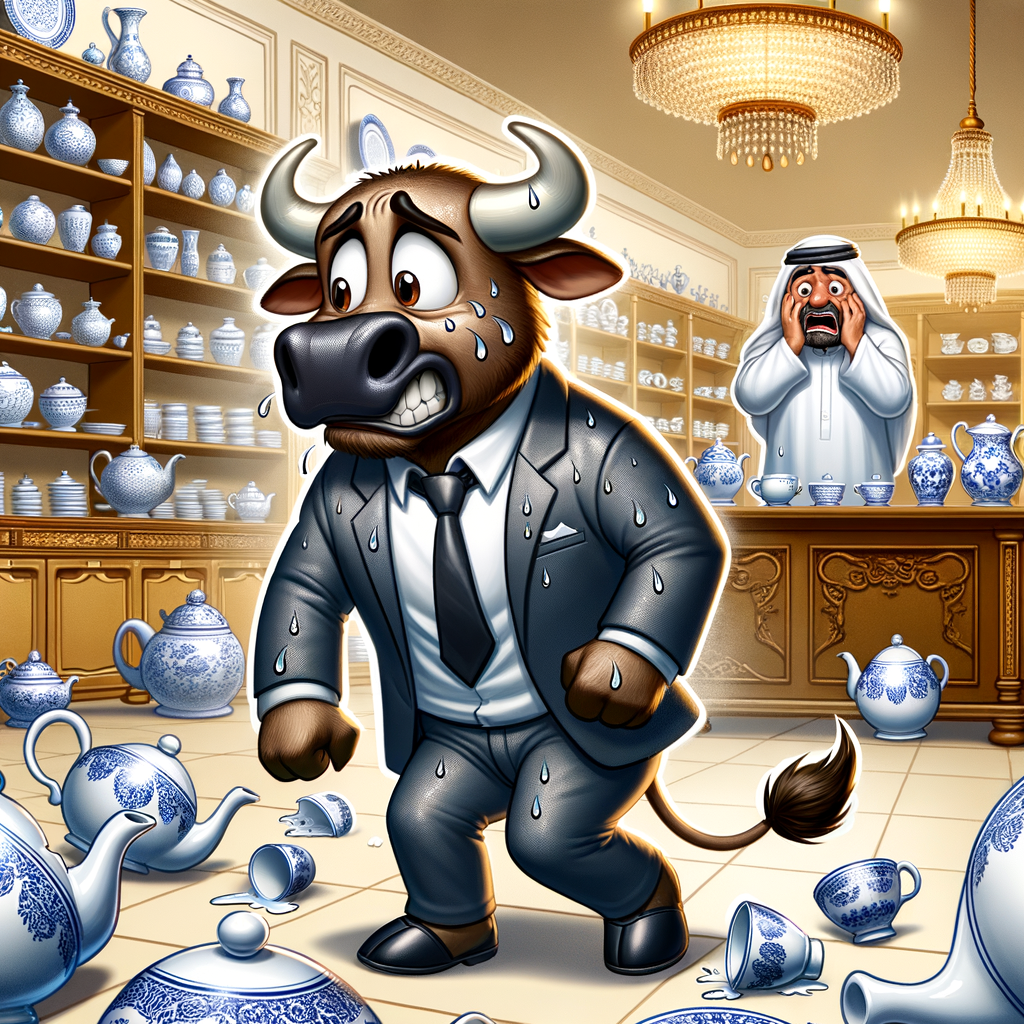

DALL-E-3


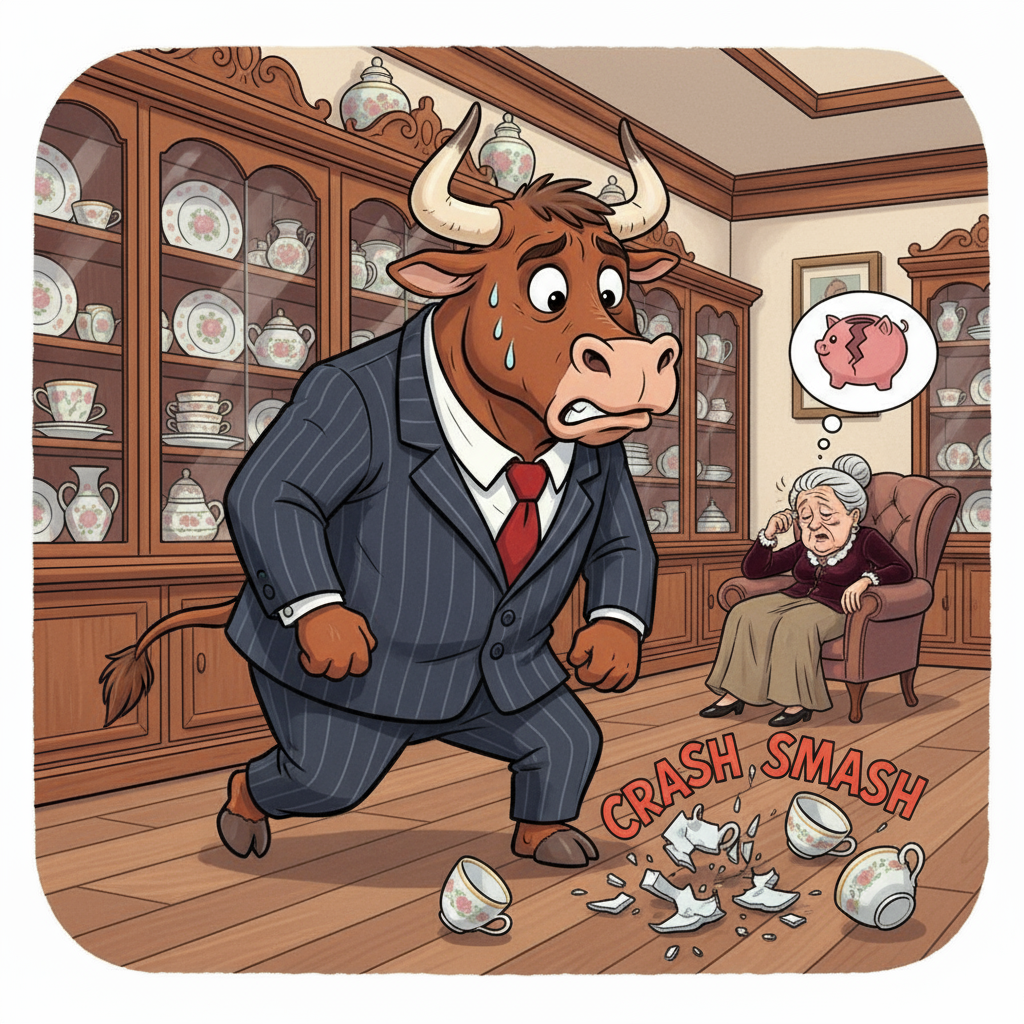

Gemini-2.5-Flash-Image


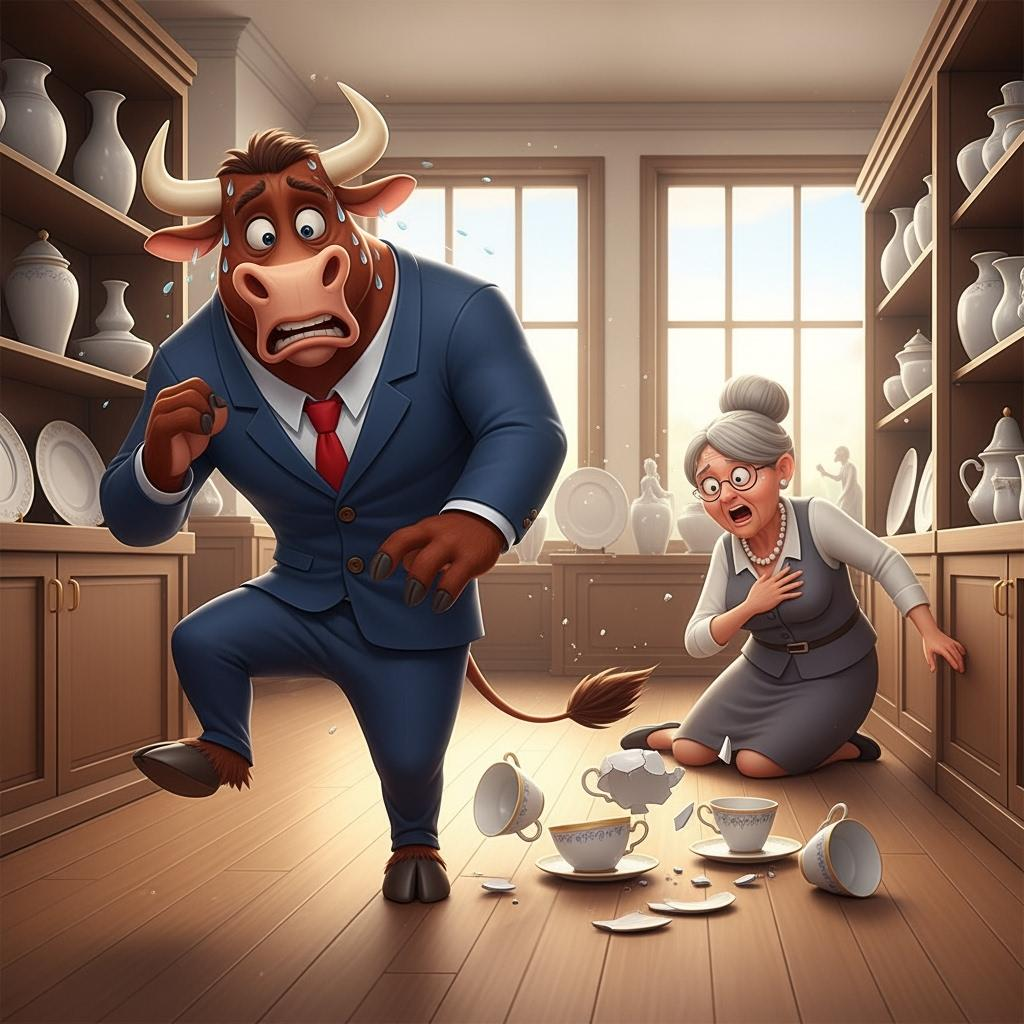

Imagen-4


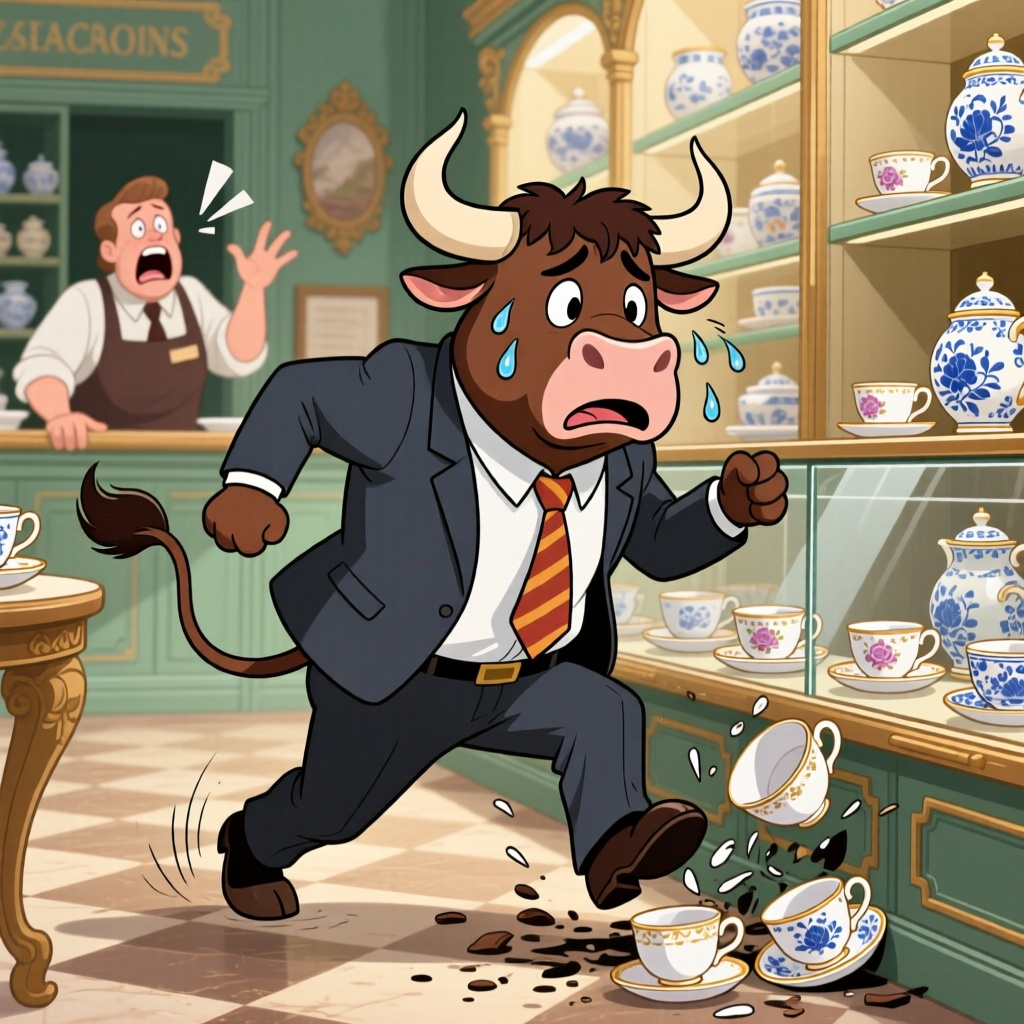

Qwen-Image


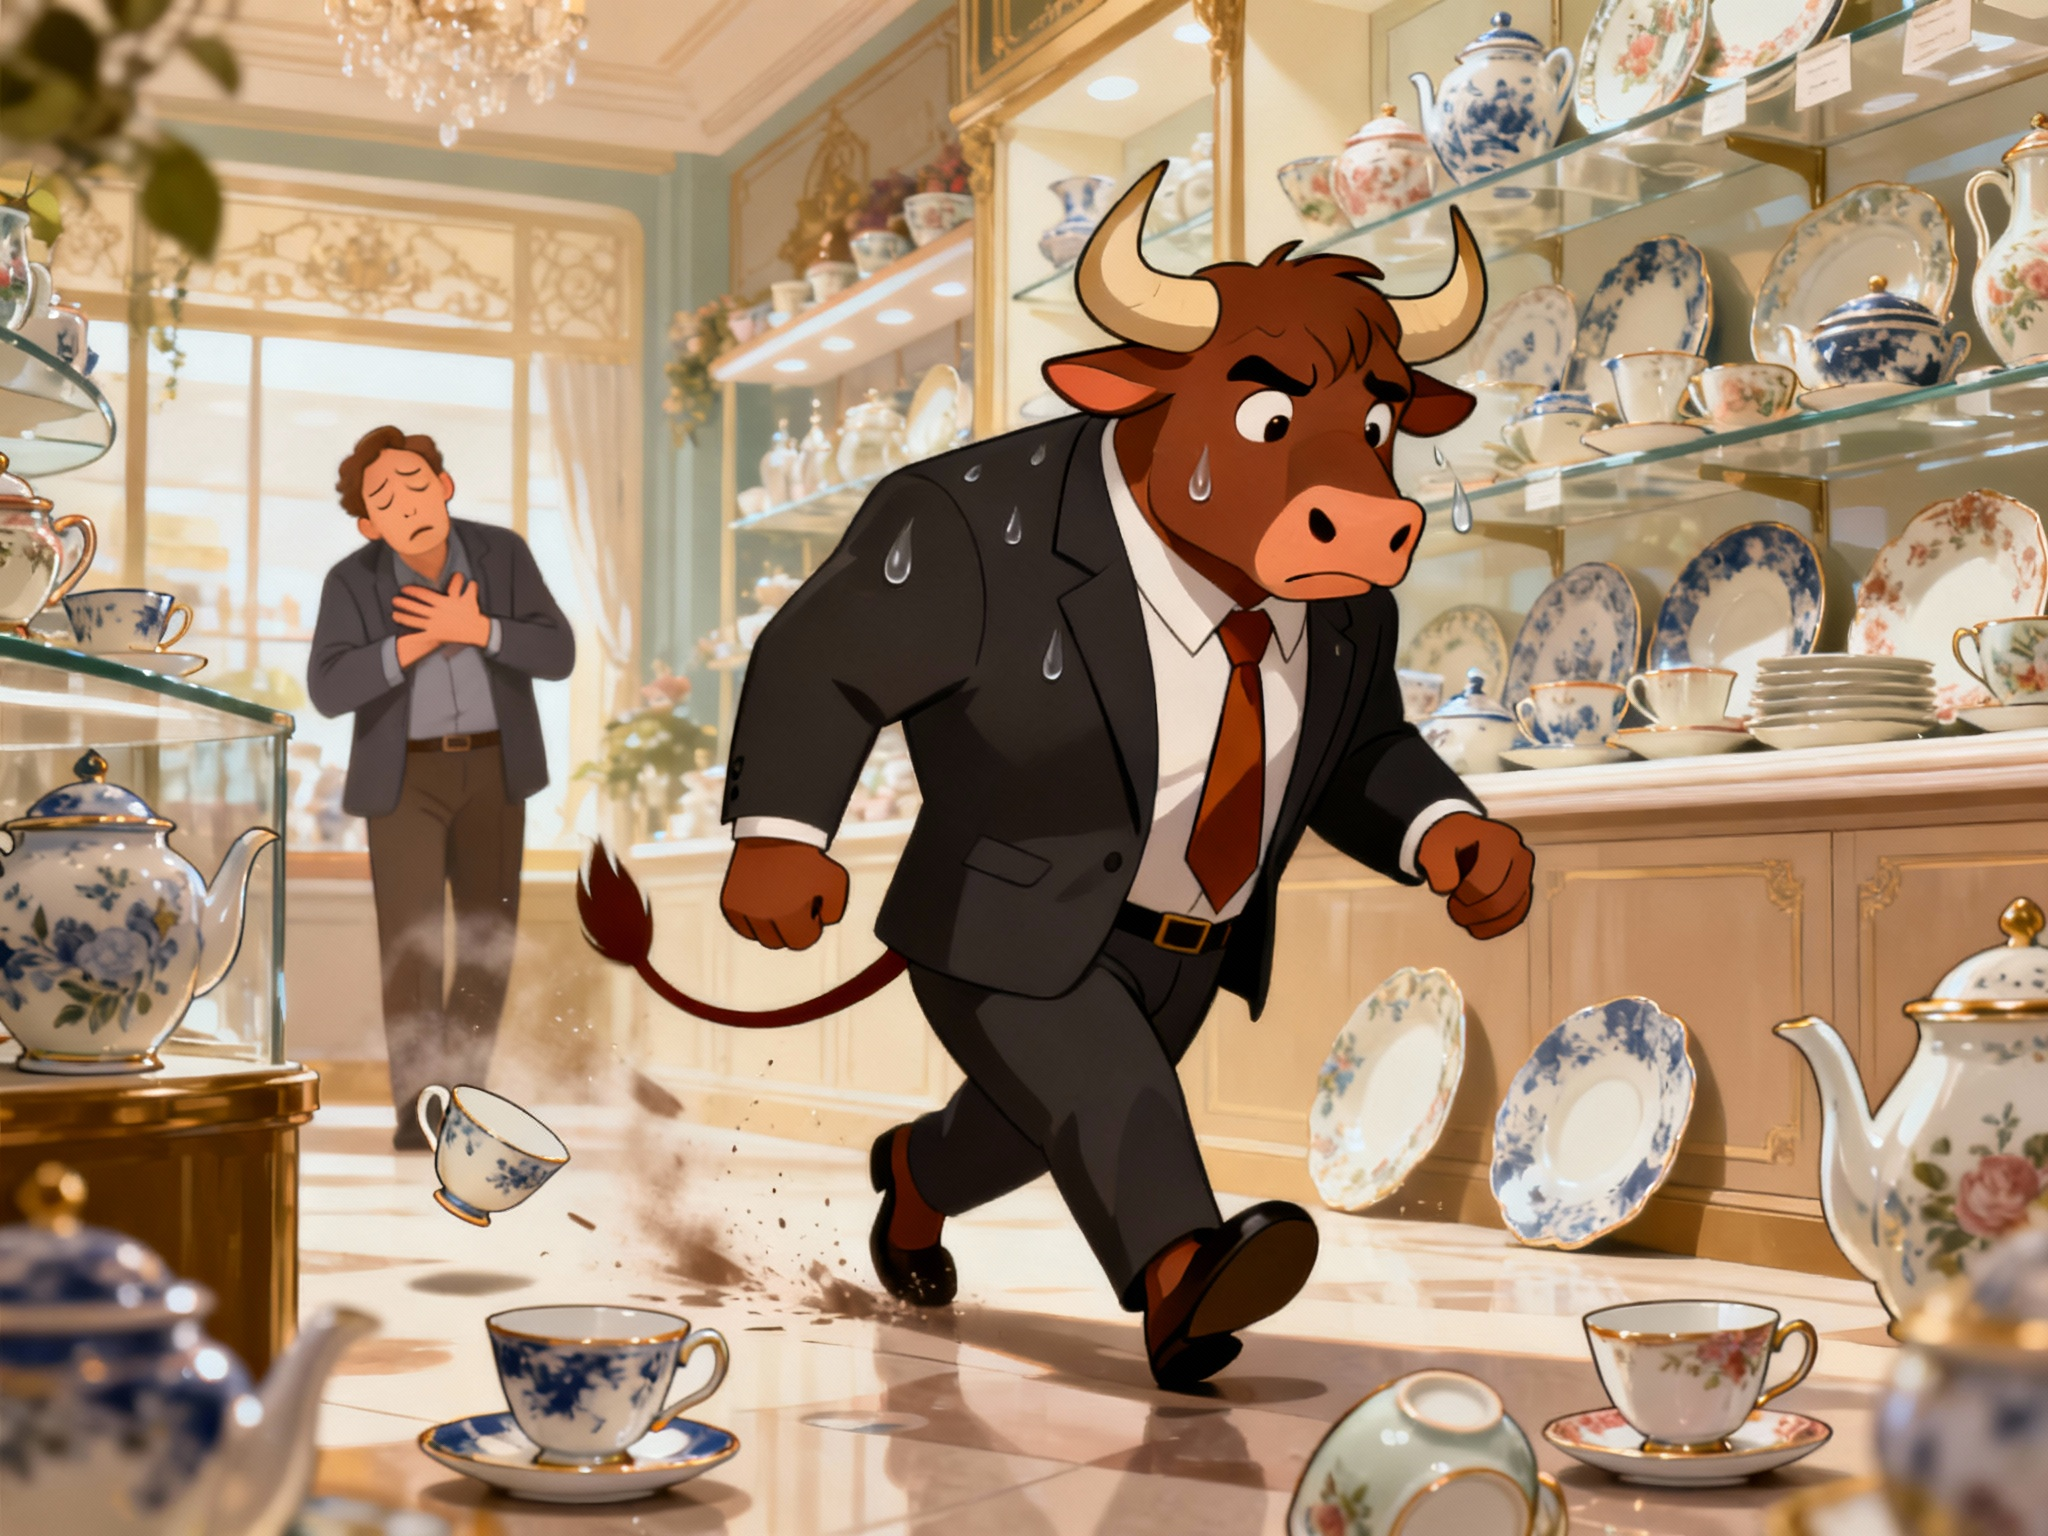

Seedream-4.0


In [47]:
for j in range(6):
    chat = client.chat.completions.create(
        model = models[j],
        messages = [{"role": "user", "content":demo}],
    )
    img = chat.choices[0].message.content
    save_generated_image(img,f'demo_{models[j]}.jpg')
    print(models[j])

In [ ]:
for i in range(20,1000,20):
    print(i)
    print(idioms[i])
    print(Decriptions[i])
    print('-'*88)
    for m in models:
        chat = client.chat.completions.create(
            model = m,
            messages = [{"role": "user", "content":Decriptions[i]+"\naspect is 1:1, quality is low"}],
        )
        img = chat.choices[0].message.content
        save_generated_image(output=img,filename=f'{i+1}_{m}.jpg',show=False)
    # print(models[j])